
1. You are provided the titanic dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Use the Logistic regression created from scratch (from the prev question) in this question as well.
3. Data cleaning plays a major role in this question. Report all the methods used by you in the ipynb.

--> 

i. Check for missing values

ii. Drop Columns & Handle missing values

iii. Create dummies for categorical features

you are free to perform other data cleaning to improve your results.



4. Report accuracy score, Confusion matrix, heat map, classifiaction report and any other metrics you feel useful.

dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

(titanic.csv)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/SMAI/titanic/titanic.csv")  

In [ ]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
659,660,0,1,"Newell, Mr. Arthur Webster",male,58.0,0,2,35273,113.2750,D48,C
316,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C
363,364,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S


In [ ]:
df.drop('PassengerId',axis='columns',inplace=True)
df.drop('Name',axis='columns',inplace=True)
df.drop('Ticket',axis='columns',inplace=True)
df.drop('Cabin',axis='columns',inplace=True)
df.drop('Age',axis='columns',inplace=True)

In [ ]:
df.sample(5)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
321,0,3,male,0,0,7.8958,S
448,1,3,female,2,1,19.2583,C
696,0,3,male,0,0,8.0500,S
751,1,3,male,0,1,12.4750,S
725,0,3,male,0,0,8.6625,S


In [ ]:
#df.isnull()
df.isnull().sum(axis = 0)
#df['Cabin']

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [ ]:
df.loc[df.isnull().any(axis=1)]

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
61,1,1,female,0,0,80.0,NaN
829,1,1,female,0,0,80.0,NaN


In [ ]:
df['Embarked']=df['Embarked'].fillna('S')

In [ ]:
df.isnull().sum(axis = 0)


Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df2 = pd.get_dummies(data=df, columns=['Embarked'])

In [ ]:
df2.sample(5)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
590,0,3,male,0,0,7.1250,0,0,1
766,0,1,male,0,0,39.6000,1,0,0
823,1,3,female,0,1,12.4750,0,0,1
432,1,2,female,1,0,26.0000,0,0,1
502,0,3,female,0,0,7.6292,0,1,0


In [ ]:
df2['Sex'].replace({'female':1,'male':0},inplace=True)


In [ ]:
df2.sample(5)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
808,0,2,0,0,0,13.0000,0,0,1
826,0,3,0,0,0,56.4958,0,0,1
329,1,1,1,0,1,57.9792,1,0,0
58,1,2,1,1,2,27.7500,0,0,1
715,0,3,0,0,0,7.6500,0,0,1


In [ ]:
y = df2['Survived'].to_numpy()
df2.drop('Survived',axis='columns',inplace=True)

X = df2.to_numpy()

In [ ]:
print(y.shape, X.shape)

(891,) (891, 8)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3 )
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(623, 8) (268, 8) (623,) (268,)


In [ ]:
class logistic_regression():
  def __init__(self, iterations=10000, alpha=0.01, gamma=0.01, gd="plain", version="batch", batch_size=32):
    self.m = 0
    self.itterations = iterations
    self.cost_values = []
    self.trained_parameters = []
    self.weights = []
    self.bias = 0
    self.alpha = alpha
    self.update_dw = 0
    self.update_db = 0
    self.grad_type = gd
    self.gamma = gamma
    self.batch_size = batch_size
    self.version = version
    self.start = 0

  def plain_grad_desc(self, X, y, hypothesis, alpha):
    dw =  1/self.m * np.dot(X.T, (hypothesis-y))
    db =  1/self.m * np.sum(hypothesis-y)
    self.weights = self.weights - self.alpha*dw
    self.bias = self.bias - self.alpha*db

  def mini_batch_plain_grad_desc(self, X, y, hypothesis, alpha, start, batch_size):
    dw =  1/self.m * np.dot(X[start:batch_size].T, (hypothesis-y)[start:batch_size])
    db =  1/self.m * np.sum((hypothesis-y)[start:batch_size])
    self.weights = self.weights - self.alpha*dw
    self.bias = self.bias - self.alpha*db
    if (batch_size == 1):
      start = (start+1)%X.shape[0]
      return start
    start = start + batch_size
    if (start >= ((X.shape[0]//batch_size)*batch_size)):
      start = 0
    return start

  def momentum_based_grad_desc(self, X, y, hypothesis, alpha, gamma):
    dw =  1/self.m * np.dot(X.T, (hypothesis-y))
    db =  1/self.m * np.sum(hypothesis-y)
    self.update_dw = gamma*self.update_dw + self.alpha*dw
    self.update_db = gamma*self.update_db + self.alpha*db
    self.weights = self.weights - self.update_dw
    self.bias = self.bias - self.update_db

  def nesterov_grad_desc(self, X, y, hypothesis, alpha, gamma):
    dw =  1/self.m * np.dot(X.T, (hypothesis-y))
    db =  1/self.m * np.sum(hypothesis-y)
    
    weights_lookahead = self.weights - gamma*self.update_dw
    self.update_dw = gamma*self.update_dw + self.alpha*weights_lookahead
    self.weights = self.weights - self.update_dw

    bias_lookahead = self.bias - gamma*self.update_db
    self.update_db = gamma*self.update_db + self.alpha*bias_lookahead
    self.bias = self.bias - self.update_db

  def fit(self, X, y):
    X = X/255
    #self.y = datasets[i][:,-1].reshape((2062,1))
    self.m = X.shape[0]
    self.weights = np.random.rand(X.shape[1],1)
    costfunc_values = []
    k = 0
    for i in range(1,self.itterations+1):
      #logistic function
      z = np.dot(X, self.weights) + self.bias 
      #z = np.matmul(X,weights) + bias 
      hypothesis = 1/(1 + np.exp(-z)) 
      #cost function
      cost = 1/self.m*(-1*(np.sum(y*np.log(hypothesis) + (1-y)*np.log(1-hypothesis))))
      costfunc_values.append(cost)
      #print(i,cost)
      k+=1

      #gradient decent
      if (self.grad_type=="plain" and self.version=="batch" ):
        self.plain_grad_desc(X, y, hypothesis, self.alpha)
      elif (self.grad_type=="momentum_based" and self.version=="batch" ):
        self.momentum_based_grad_desc(X, y, hypothesis, self.alpha, self.gamma)
      elif (self.grad_type=="nesterov" and self.version=="batch" ):
        self.nesterov_grad_desc(X, y, hypothesis, self.alpha, self.gamma)
      elif (self.grad_type=="plain" and self.version=="mini-batch" ):
        self.start = self.mini_batch_plain_grad_desc(X, y, hypothesis, self.alpha, self.start, self.batch_size)
      elif (self.grad_type=="plain" and self.version=="stochastic" ):
        self.start = self.mini_batch_plain_grad_desc(X, y, hypothesis, self.alpha, self.start, 1)
      #dw =  1/self.m * np.dot(X.T, (hypothesis-y))
      #db =  1/self.m * np.sum(hypothesis-y)
      #self.weights = self.weights - self.alpha*dw
      #self.bias = self.bias - self.alpha*db
      print('running @ ',i,cost)
      #stop training
      #if i%100 == 0:
      #  print('running @ ',cost)
      #print(len(costfunc_values))
      if i%3 == 0 and cost < 100:
        if abs(cost-costfunc_values[-2])<0.000001:
          if abs(cost-costfunc_values[-3])<0.000001:
            break 
    self.cost_values.append(costfunc_values)  
    self.trained_parameters.append([self.weights,self.bias])      
    print('itteration number:',k)

  def predict(self, X, y):
    
    X=X/255
    confusion_matrix = np.zeros((2,2))
    self.weights = self.trained_parameters[0][0]
    self.bias = self.trained_parameters[0][1]
    correct_predictions = 0 
    for i in range(X.shape[0]):
      
      z = np.dot(X[i],self.weights) + self.bias 
      
      hypothesis = 1/(1 + np.exp(-z))
      if (hypothesis[0] >= 0.5 ):
        if (y[i] == 1):
          correct_predictions+=1
          confusion_matrix[1][1] += 1
        else:
          confusion_matrix[0][1] += 1
      elif (hypothesis[0] < 0.5):
        if (y[i] == 0):
          correct_predictions+=1    
          confusion_matrix[0][0] += 1
        else:
          confusion_matrix[1][0] += 1

      #if (hypothesis[0] >= 0.5 and y[i] == 1):
      #    correct_predictions+=1
      #elif (hypothesis[0] < 0.5 and y[i] == 0):
      #    correct_predictions+=1    
        
    acc = (correct_predictions/X.shape[0])*100
    print('accuracy for dataset ',acc)
    print("confusion_matrix :\n",confusion_matrix)

In [ ]:
clf = logistic_regression(iterations=5000, alpha=0.01, gamma=0.01, gd="plain")

In [ ]:
clf.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
running @  2 421.887695870995
running @  3 417.53494752290646
running @  4 416.7556349940325
running @  5 416.5436247921535
running @  6 416.47938488690176
running @  7 416.4466266176221
running @  8 416.4213009233209
running @  9 416.39765214464717
running @  10 416.37439375124535
running @  11 416.3512285252556
running @  12 416.3280888709563
running @  13 416.30495929842385
running @  14 416.28183626995377
running @  15 416.2587189754403
running @  16 416.23560722873964
running @  17 416.21250098629486
running @  18 416.1894002371418
running @  19 416.1663049777678
running @  20 416.14321520636236
running @  21 416.1201309215033
running @  22 416.097052121857
running @  23 416.07397880610904
running @  24 416.0509109729494
running @  25 416.02784862106824
running @  26 416.0047917491551
running @  27 415.9817403558985
running @  28 415.95869443998697
running @  29 415.9356540001079
running @  30 415.9126190349475
running @  31 415.8

In [ ]:
clf.predict(X_test,y_test)

accuracy for dataset  70.52238805970148
confusion_matrix :
 [[147.  21.]
 [ 58.  42.]]


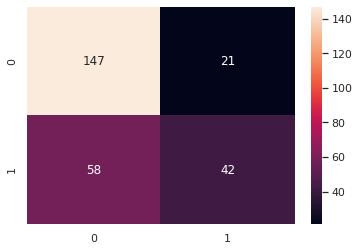

In [ ]:
import seaborn as sns; sns.set_theme()
cm = np.array([[147,  21],
               [ 58,  42]])
ax = sns.heatmap(cm, annot=True, fmt="d")